In [ ]:
#pip install biopython numpy matplotlib

In [7]:
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB import Polypeptide
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
parser = PDBParser()
structure = parser.get_structure("test", "9LG6.pdb") # add your pdb file

In [9]:
for model in structure:
    for chain in model:
        polypeptides = Polypeptide.PPBuilder().build_peptides(chain)
        
        for poly in polypeptides:

            print(f"{'Résidu':<10} {'Phi (°)':<12} {'Psi (°)':<12}")
            print("-" * 40)
            
            phi_psi = poly.get_phi_psi_list()
            
            for residue, (phi, psi) in zip(poly, phi_psi):
                phi_str = f"{np.degrees(phi):.2f}" if phi is not None else "N/A"
                psi_str = f"{np.degrees(psi):.2f}" if psi is not None else "N/A"
                
                print(f"{residue.get_resname()}{residue.id[1]:<6} {phi_str:<12} {psi_str:<12}")

Résidu     Phi (°)      Psi (°)     
----------------------------------------
TRP16     N/A          105.62      
GLU17     -140.38      155.11      
TRP18     -75.50       -12.06      
ASN19     -65.12       -44.04      
VAL20     -99.59       -16.66      
THR21     -97.78       -35.90      
TRP22     -117.05      -51.26      
ASN23     -103.27      76.43       
THR24     -160.02      152.81      
SER25     -69.14       -39.90      
ASN26     -108.07      98.86       
PRO27     -81.63       106.33      
ASP28     -116.20      134.09      
PHE29     -67.53       145.17      
THR30     -65.56       158.06      
LYS31     -62.67       -45.92      
CYS32     -63.04       -41.92      
PHE33     -60.16       -43.73      
GLN34     -56.43       -49.60      
ASN35     -80.89       -10.17      
THR36     -110.41      -61.68      
VAL37     -79.79       -39.22      
LEU38     -63.89       -23.79      
VAL39     -92.49       -27.62      
TRP40     -74.71       -26.86      
VAL41     -61.06      

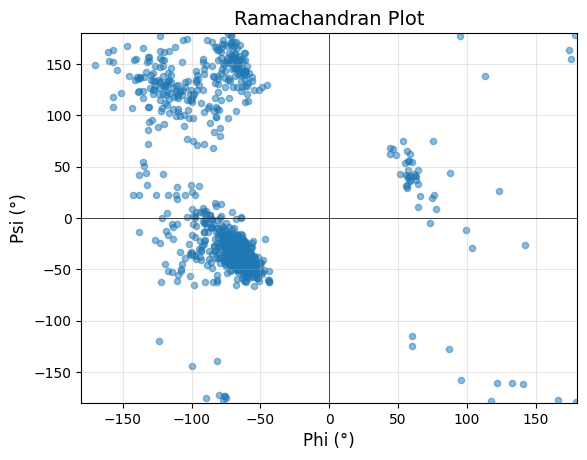

In [10]:


phi_list = []
psi_list = []

for model in structure:
    for chain in model:
        polypeptides = Polypeptide.PPBuilder().build_peptides(chain)
        
        for poly in polypeptides:
            phi_psi = poly.get_phi_psi_list()
            
            for phi, psi in phi_psi:
                if phi is not None and psi is not None:
                    phi_list.append(np.degrees(phi))
                    psi_list.append(np.degrees(psi))

plt.figure()
plt.scatter(phi_list, psi_list, alpha=0.5, s=20)
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.xlabel('Phi (°)', fontsize=12)
plt.ylabel('Psi (°)', fontsize=12)
plt.title('Ramachandran Plot', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()

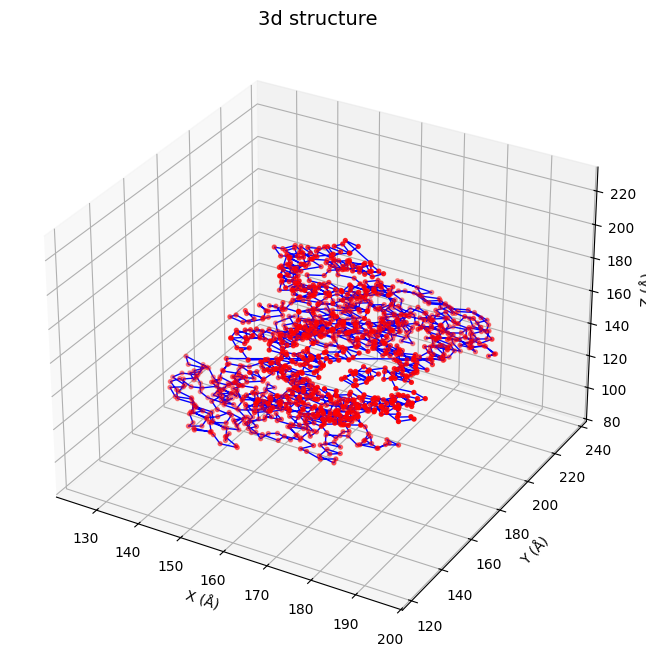

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ca_coords = []
for model in structure:
    for chain in model:
        for residue in chain:
            if 'CA' in residue:
                ca = residue['CA']
                ca_coords.append(ca.get_coord())

ca_coords = np.array(ca_coords)

ax.plot(ca_coords[:, 0], ca_coords[:, 1], ca_coords[:, 2], 'b-', linewidth=1)
ax.scatter(ca_coords[:, 0], ca_coords[:, 1], ca_coords[:, 2], c='red', s=8)

ax.set_xlabel('X (Å)', fontsize=10)
ax.set_ylabel('Y (Å)', fontsize=10)
ax.set_zlabel('Z (Å)', fontsize=10)
ax.set_title('3d structure', fontsize=14)

plt.show()